In [ ]:
 %matplotlib inline
 import warnings
 warnings.filterwarnings('ignore')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#MODELS FROM SCKIT-LEARN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

##TENSORFLOW
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
!pip install scikeras
from scikeras.wrappers import KerasClassifier


In [ ]:
SEED=42
def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [ ]:
data= pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [ ]:
data

,age,sex,chestpaintype,restingbps,cholesterol,fastingbloodsugar,restingecg,maxheartrate,exerciseangina,oldpeak,stslope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


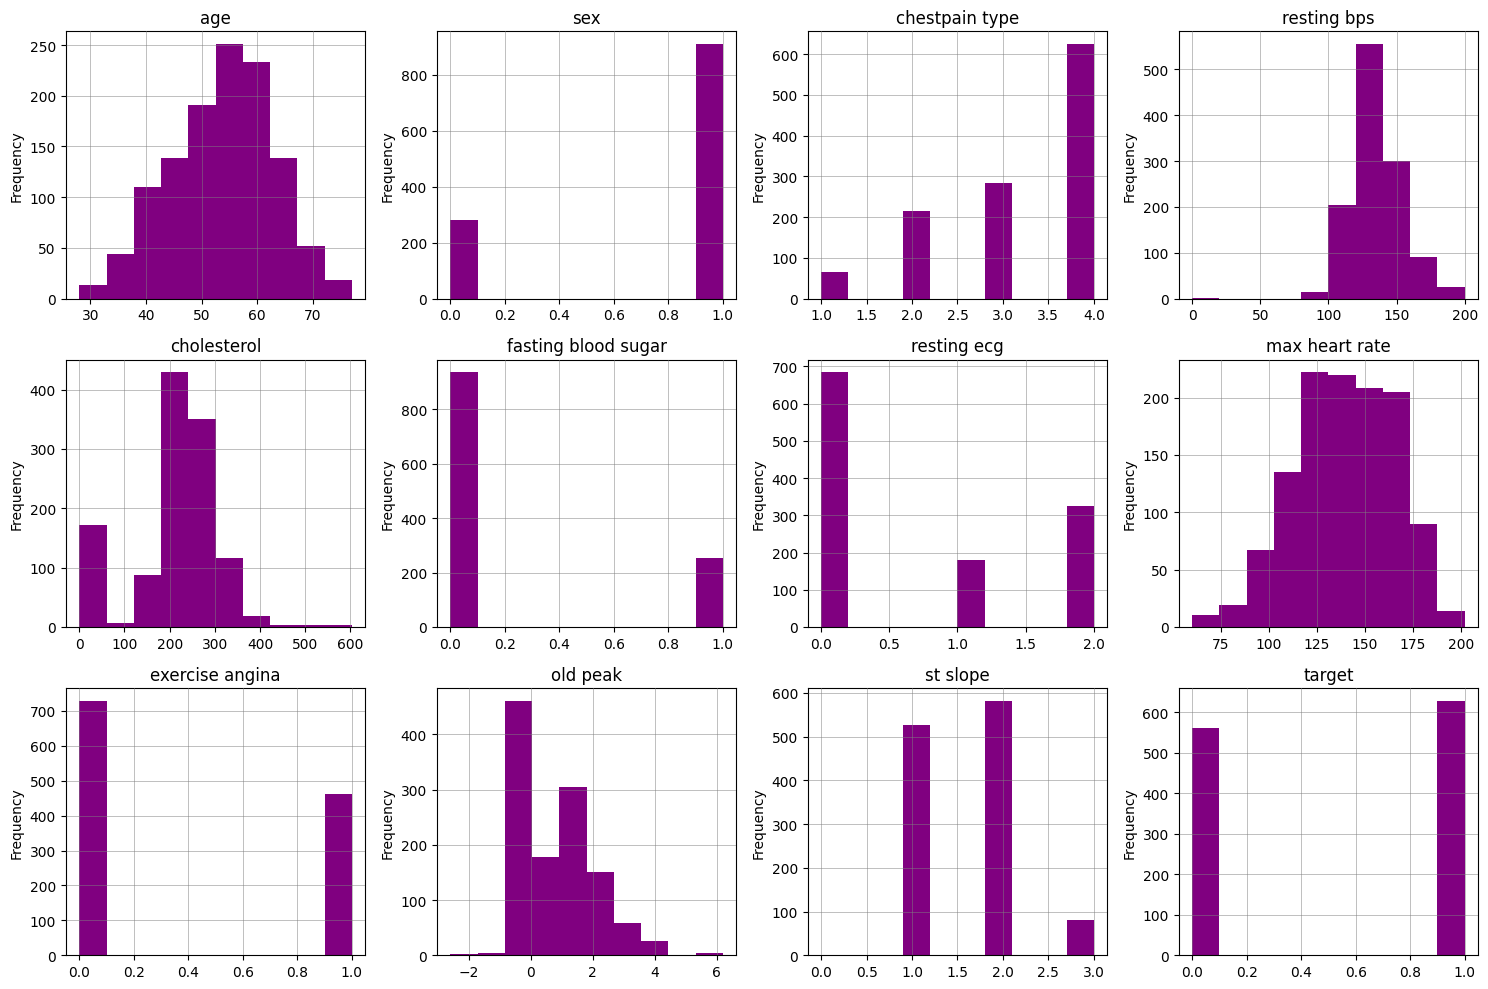

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create subplots
figure, axes = plt.subplots(3, 4)

# Set figure width and height
figure.set_figwidth(15)
figure.set_figheight(10)

# Get column names from the dataset
columns = list(data.columns)

# Initialize counter to track the current column
counter = 0

# Loop over each subplot in the grid
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        # Plot histogram in subplot
        axes[i, j].hist(data[columns[counter]], color="purple")
        axes[i, j].set_ylabel('Frequency')

        # Add grid lines and bring them to the front
        axes[i, j].grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
        axes[i, j].set_axisbelow(False)  # This brings the grid lines to the front

        # Increment counter to move to the next column
        counter += 1

# Set titles for each subplot
titles = [
    "age", "sex", "chestpain type", "resting bps",
    "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate",
    "exercise angina", "old peak", "st slope", "target"
]

# Apply titles to each subplot
for ax, title in zip(axes.flatten(), titles):
    ax.set_title(title)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


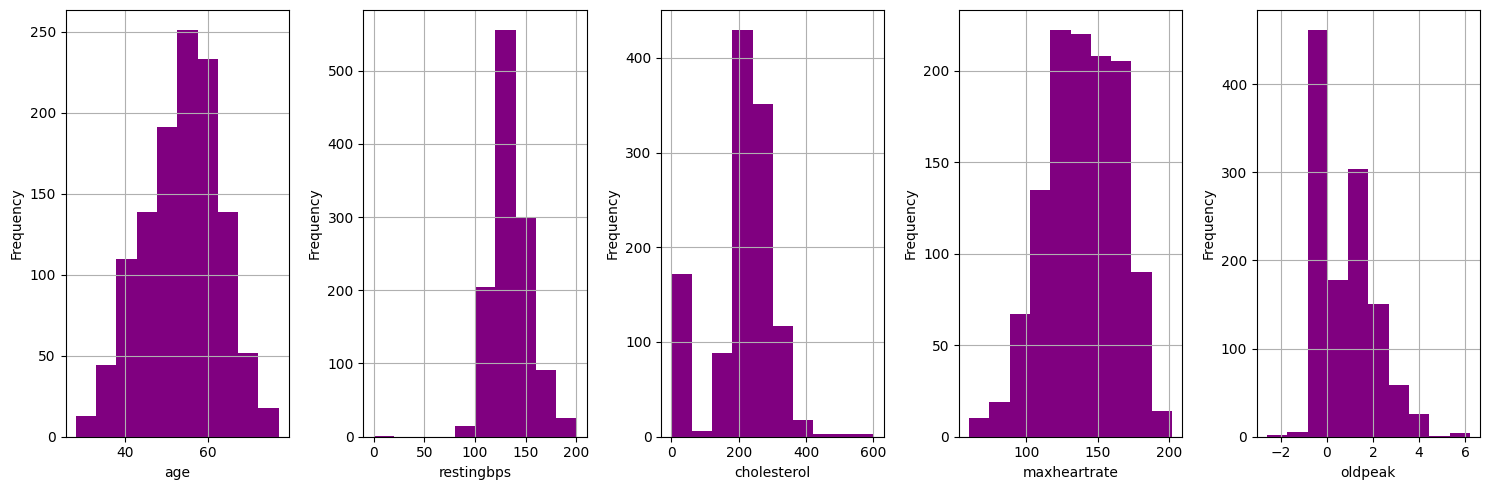

In [ ]:
# Select only the required columns
selected_columns = ["age", "restingbps", "cholesterol", "maxheartrate", "oldpeak"]

# Create subplots for the selected columns
figure, axes = plt.subplots(1, len(selected_columns))
figure.set_figwidth(15)
figure.set_figheight(5)

# Plot histograms for each selected column
for ax, col in zip(axes, selected_columns):
    ax.hist(data[col], color="purple")
    #ax.set_title(col)
    ax.grid(True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'chestpaintype', 'restingbps', 'cholesterol',
       'fastingbloodsugar', 'restingecg', 'maxheartrate', 'exerciseangina',
       'oldpeak', 'stslope', 'target'],
      dtype='object')

In [ ]:
#Checking for null values
data.isna().sum()

age                  0
sex                  0
chestpaintype        0
restingbps           0
cholesterol          0
fastingbloodsugar    0
restingecg           0
maxheartrate         0
exerciseangina       0
oldpeak              0
stslope              0
target               0
dtype: int64

In [ ]:
data.sex.value_counts()

sex
1    909
0    281
Name: count, dtype: int64

In [ ]:
data.target.value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [ ]:
data.describe()

,age,sex,chestpaintype,restingbps,cholesterol,fastingbloodsugar,restingecg,maxheartrate,exerciseangina,oldpeak,stslope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,211,350
1,70,559


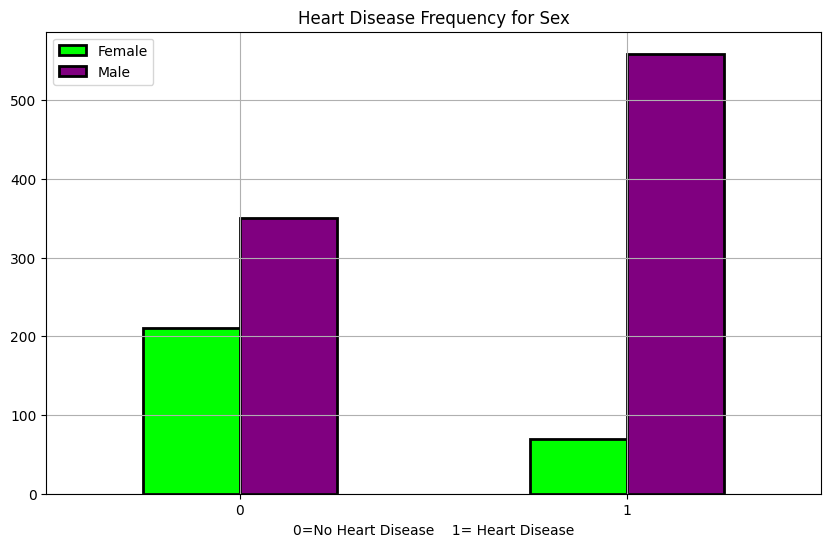

In [ ]:
# Creating a plot for the crosstab
pd.crosstab(data.target,data.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lime","purple"],edgecolor='black',linewidth=2)
plt.xlabel("0=No Heart Disease    1= Heart Disease")
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female","Male"])
plt.grid(True)
plt.xticks(rotation=0);



In [ ]:
data.sex

0       1
1       0
2       1
3       0
4       1
       ..
1185    1
1186    1
1187    1
1188    0
1189    1
Name: sex, Length: 1190, dtype: int64

In [ ]:
#MODELLING
x=data.drop("target",axis=1)
y=data["target"]

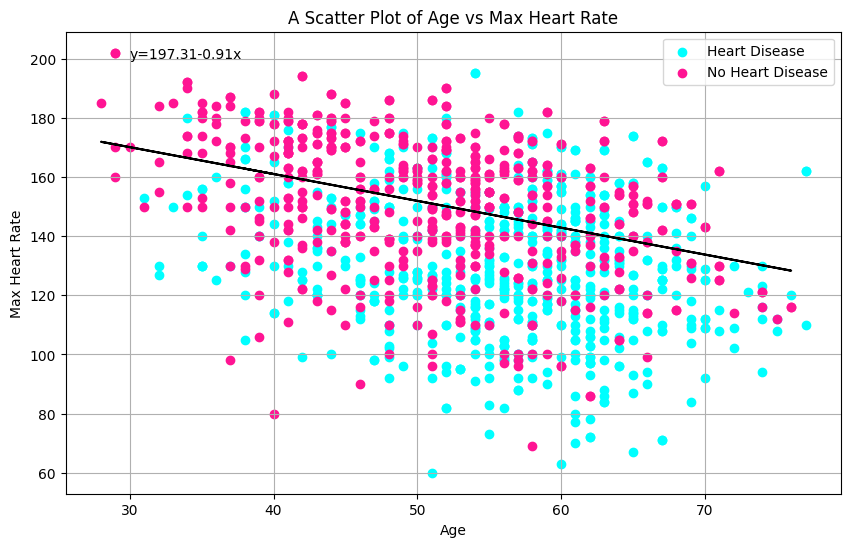

In [ ]:
plt.figure(figsize=(10,6))
#Trying some positive examples
plt.scatter(data.age[data.target==1],
           data.maxheartrate[data.target==1],c='cyan')

#Trying some negative examples
plt.scatter(data.age[data.target==0],
           data.maxheartrate[data.target==0],c="deeppink")

plt.title("A Scatter Plot of Age vs Max Heart Rate")
plt.xlabel("Age")
a, b = np.polyfit(data.age[data.target==0],data.maxheartrate[data.target==0] , 1)
plt.text(30,200,f"y={np.round(b,2)}{np.round(a,2)}x")

plt.plot(data.age[data.target==0], a*data.age[data.target==0]+b, color="black")
plt.ylabel("Max Heart Rate")
plt.grid(True)
plt.legend(["Heart Disease","No Heart Disease"]);


In [ ]:
pd.crosstab(data.chestpaintype,data.target)

target,0,1
chestpaintype,,
1,41,25
2,185,31
3,193,90
4,142,483


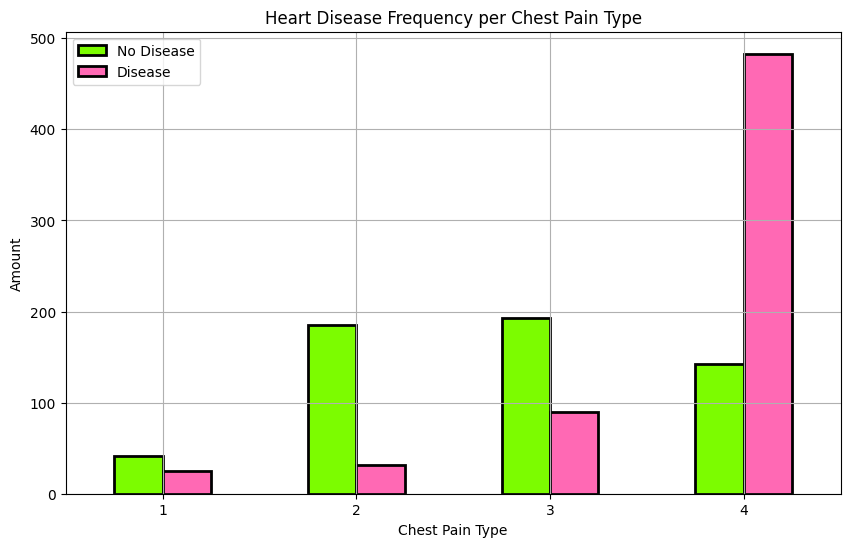

In [ ]:
pd.crosstab(data.chestpaintype,data.target).plot(kind="bar",
                                 figsize=(10,6),color=["lawngreen","hotpink"],edgecolor='black',linewidth=2)
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.grid(True)

plt.xticks(rotation=0);

In [ ]:
#Spliting data into train and test sets
np.random.seed(42)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.count()

age                  952
sex                  952
chestpaintype        952
restingbps           952
cholesterol          952
fastingbloodsugar    952
restingecg           952
maxheartrate         952
exerciseangina       952
oldpeak              952
stslope              952
dtype: int64

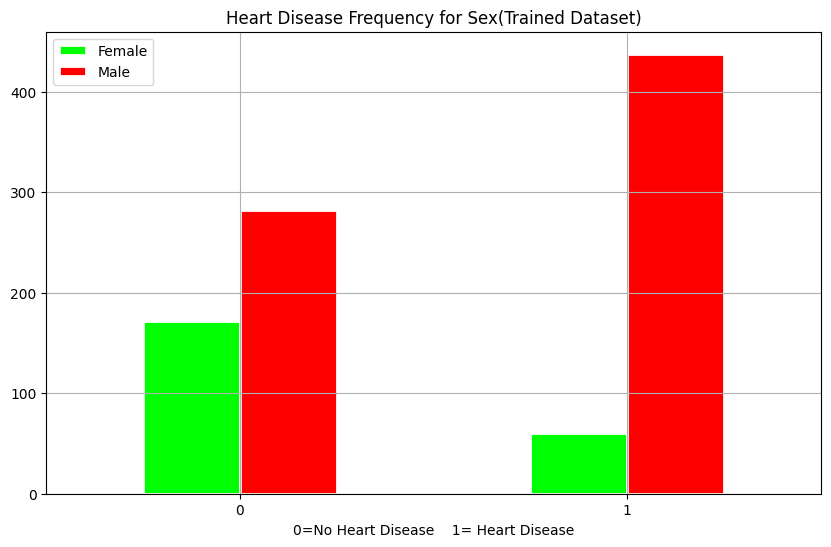

In [ ]:
pd.crosstab(y_train,x_train.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lime","red"],edgecolor='white',linewidth=2)
plt.xlabel("0=No Heart Disease    1= Heart Disease")
plt.title("Heart Disease Frequency for Sex(Trained Dataset)")
plt.legend(["Female","Male"])
plt.grid(True)
plt.xticks(rotation=0);

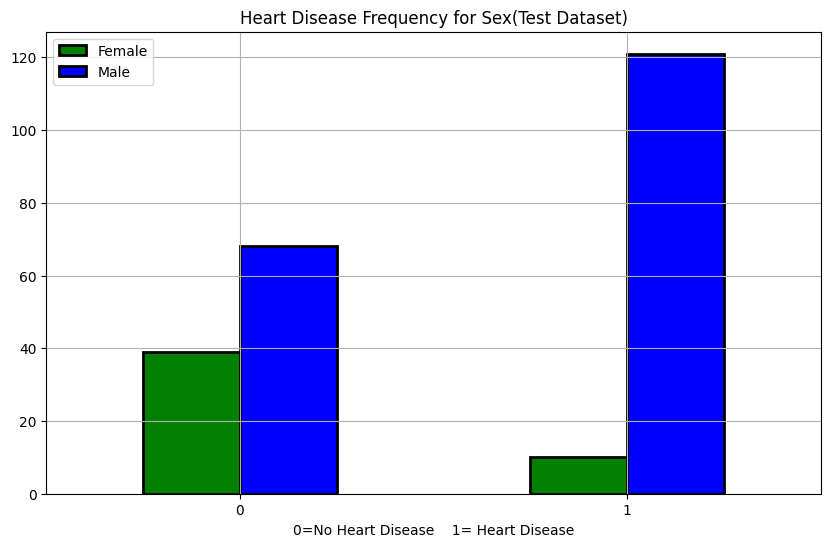

In [ ]:
pd.crosstab(y_test,x_test.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["green","blue"],edgecolor='black',linewidth=2)
plt.xlabel("0=No Heart Disease    1= Heart Disease")
plt.title("Heart Disease Frequency for Sex(Test Dataset)")
plt.legend(["Female","Male"])
plt.grid(True)
plt.xticks(rotation=0);

In [ ]:

data.corr()

,age,sex,chestpaintype,restingbps,cholesterol,fastingbloodsugar,restingecg,maxheartrate,exerciseangina,oldpeak,stslope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chestpaintype,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
restingbps,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fastingbloodsugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
restingecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
maxheartrate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exerciseangina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


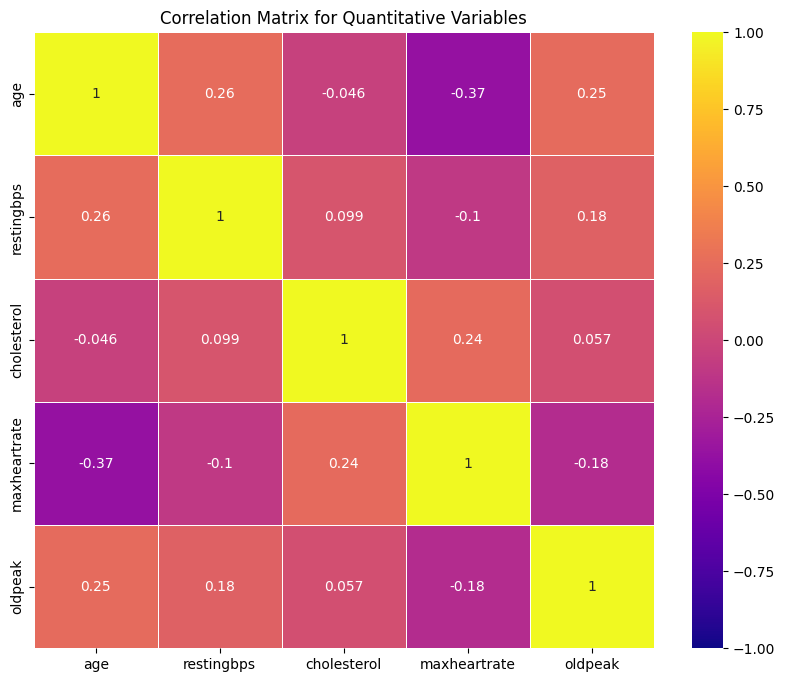

In [ ]:
# Select only the required columns
selected_columns = ["age", "restingbps", "cholesterol", "maxheartrate", "oldpeak"]
filtered_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation matrix?
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Quantitative Variables')
plt.show()

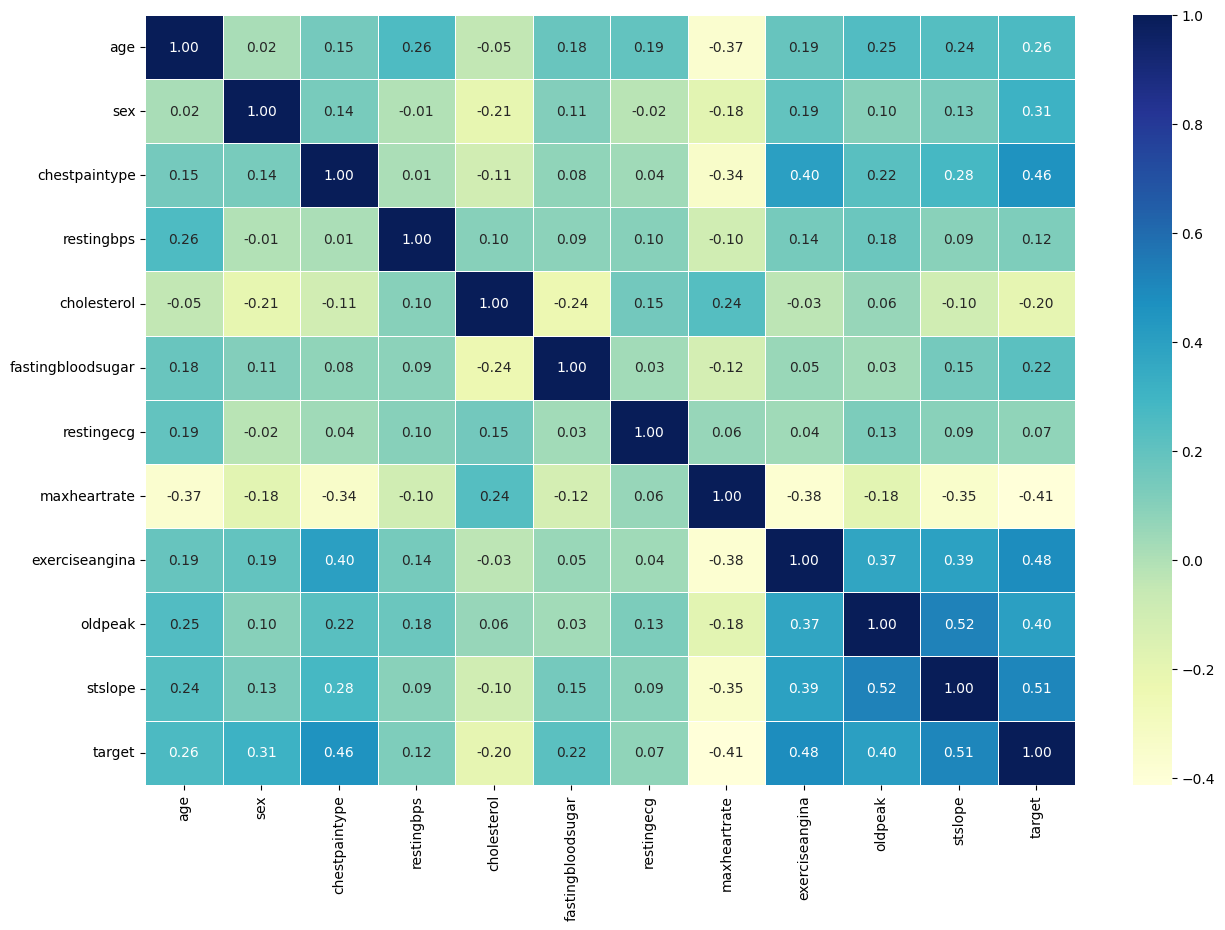

In [ ]:
#Creating a heatmap with the data
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix
               ,annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

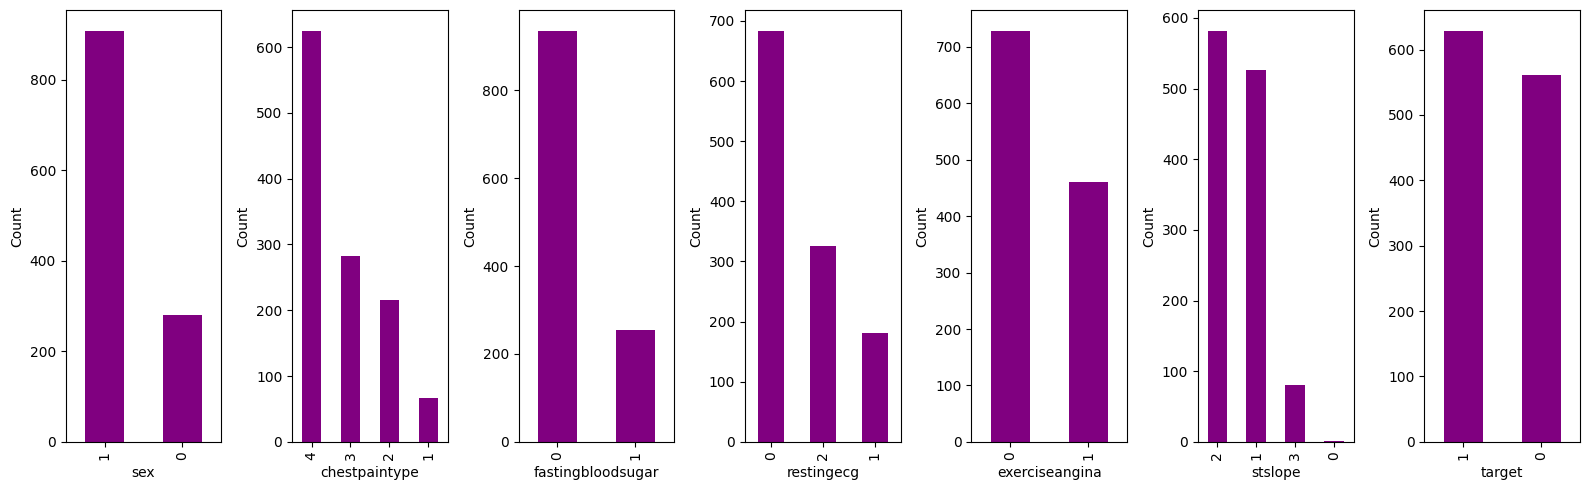

In [ ]:
import matplotlib.pyplot as plt

# List of columns to create bar charts for
selected_columns = ["sex", "chestpaintype", "fastingbloodsugar", "restingecg", "exerciseangina", "stslope", "target"]

# Set up the subplots
fig, axes = plt.subplots(1, 7, figsize=(16, 5))
axes = axes.flatten()

# Plot bar charts for each selected column
for ax, col in zip(axes, selected_columns):
    data[col].value_counts().plot.bar(ax=ax, color="purple")
    #ax.set_title(col)
    ax.set_ylabel('Count')
    ax.set_xlabel(col)

# Remove the extra subplot (if any)
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


### LOGISTIC REGRESSION, K-NEAREST NEIGHBOUR and SUPPORT VECTOR MACHINE Baseline Models





In [ ]:
from sklearn.metrics.pairwise import linear_kernel
#MODEL
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"SVM":SVC()}
def fit_and_score(models,x_train,x_test,y_train,y_test):

  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name]=model.score(x_test,y_test)
  return model_scores

In [ ]:
model_output= fit_and_score(models,x_train,x_test,y_train,y_test)
model_output

{'Logistic Regression': 0.8319327731092437,
 'KNN': 0.7184873949579832,
 'SVM': 0.726890756302521}


### ARTIFICIAL NEURAL NETWORK (Tensorflow)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Recall, Precision

# Custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define the model
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), F1Score()])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Metrics:\n Accuracy: {test_accuracy}\n Precision: {test_precision}\n Recall: {test_recall}\n F1 Score: {test_f1_score}")


Epoch 1/100
24/24 - 10s - 415ms/step - accuracy: 0.4993 - f1_score: 0.5122 - loss: 17.8486 - precision: 0.5348 - recall: 0.4914 - val_accuracy: 0.4136 - val_f1_score: 0.5821 - val_loss: 6.2655 - val_precision: 0.4407 - val_recall: 0.8571
Epoch 2/100
24/24 - 0s - 4ms/step - accuracy: 0.5191 - f1_score: 0.5296 - loss: 12.5913 - precision: 0.5553 - recall: 0.5061 - val_accuracy: 0.4764 - val_f1_score: 0.6454 - val_loss: 3.1587 - val_precision: 0.4764 - val_recall: 1.0000
Epoch 3/100
24/24 - 0s - 4ms/step - accuracy: 0.5480 - f1_score: 0.5721 - loss: 8.2398 - precision: 0.5793 - recall: 0.5651 - val_accuracy: 0.5079 - val_f1_score: 0.6328 - val_loss: 1.6276 - val_precision: 0.4909 - val_recall: 0.8901
Epoch 4/100
24/24 - 0s - 4ms/step - accuracy: 0.5283 - f1_score: 0.5496 - loss: 7.2608 - precision: 0.5615 - recall: 0.5381 - val_accuracy: 0.6021 - val_f1_score: 0.6607 - val_loss: 1.2561 - val_precision: 0.5564 - val_recall: 0.8132
Epoch 5/100
24/24 - 0s - 4ms/step - accuracy: 0.5204 - f1_s

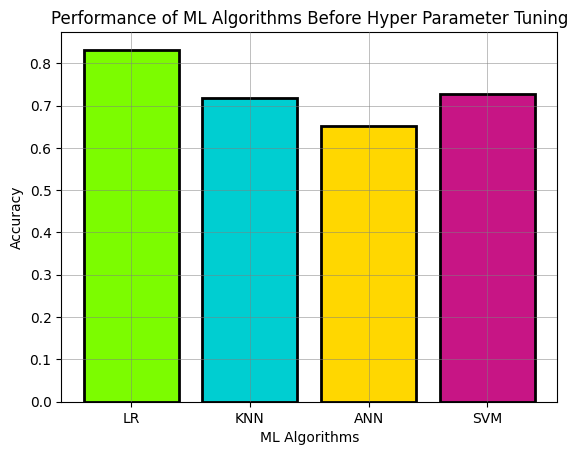

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
x = ["LR", "KNN", "ANN", "SVM"]
height = [model_output["Logistic Regression"], model_output["KNN"], test_accuracy, model_output["SVM"]]
y = ["LR", "KNN", "ANN", "SVM"]

# Plotting
plt.bar(x, height, tick_label=y, width=0.8, color=['lawngreen', 'darkturquoise', 'gold', 'mediumvioletred'], edgecolor='black', linewidth=2)

# Labeling the axes
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')

# Setting the title
plt.title('Performance of ML Algorithms Before Hyper Parameter Tuning')

# Adding grid
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
plt.gca().set_axisbelow(False)  # This brings the grid lines to the front

# Display the plot
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Define the hyperparameter grid
log_reg_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01],  # Inverse of regularization strength
    'penalty': ['l2', 'none', ],  # Types of penalties
    'solver': ['newton-cg', 'lbfgs', ],  # Solvers (note 'saga' supports elasticnet)
    'max_iter': [100, 200, 500],  # Maximum number of iterations
    'class_weight': [None, 'balanced'],  # Option for dealing with imbalanced classes
}

# Setup cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Initialize the GridSearchCV object
gridlg_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    verbose=True,
    cv=cv,
    scoring='accuracy'  # Consider using a different scoring if dealing with imbalanced data
)

# Fit the model on training data
gridlg_search.fit(x_train, y_train)

# Print the best hyperparameters and the model
print("Best hyperparameters:", gridlg_search.best_params_)
print("Best model:", gridlg_search.best_estimator_)


Fitting 30 folds for each of 120 candidates, totalling 3600 fits
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best model: LogisticRegression(C=10, class_weight='balanced', solver='newton-cg')


In [ ]:
log_preds=gridlg_search.predict(x_test)
accuracy_logistic=gridlg_search.score(x_test,y_test)
precision_logistic=precision_score(y_test,log_preds)
recall_logistic=recall_score(y_test,log_preds)
f1_logisitic=f1_score(y_test,log_preds)
logistic_report={"accuracy":accuracy_logistic,"precision":precision_logistic,"recall":recall_logistic,"f1":f1_logisitic}
logistic_report


{'accuracy': 0.8529411764705882,
 'precision': 0.8692307692307693,
 'recall': 0.8625954198473282,
 'f1': 0.8659003831417624}

In [ ]:
gridlg_search.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
## KNN

# Updated hyperparameter grid
knn_grid = {
    "n_neighbors": range(1, 21, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
    "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
    "leaf_size": range(20, 41, 10),
}

# Cross-validation scheme
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Grid search setup
gridknn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_grid, verbose=True, cv=cv)

# Fit model
gridknn_search.fit(x_train, y_train)


Fitting 30 folds for each of 480 candidates, totalling 14400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': range(20, 41, 10),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [ ]:
gridknn_search.score(x_test,y_test)

0.865546218487395

In [ ]:
gridknn_search.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 15,
 'weights': 'distance'}

In [ ]:
knn_preds=gridknn_search.predict(x_test)
accuracy_knn=gridknn_search.score(x_test,y_test)
precision_knn=precision_score(y_test,knn_preds)
recall_knn=recall_score(y_test,knn_preds)
f1_knn=f1_score(y_test,knn_preds)
knn_report={"accuracy":accuracy_knn,"precision":precision_knn,"recall":recall_knn,"f1":f1_knn}
knn_report

{'accuracy': 0.865546218487395,
 'precision': 0.8613138686131386,
 'recall': 0.9007633587786259,
 'f1': 0.8805970149253731}

In [ ]:
svm_grid={"kernel":["poly","rbf","sigmoid"],"C":[50,10,1.0,0.1,0.01,5,0.5], "gamma":["scale"]}
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
gridsvm_search=GridSearchCV(estimator=SVC(),param_grid=svm_grid,verbose=True,cv=cv)

gridsvm_search.fit(x_train,y_train)


Fitting 30 folds for each of 21 candidates, totalling 630 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=SVC(),
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01, 5, 0.5],
                         'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=True)

In [ ]:
gridsvm_search.score(x_test,y_test)

0.8067226890756303

In [ ]:
gridsvm_search.best_params_

{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
svm_preds=gridsvm_search.predict(x_test)
accuracy_svm=gridsvm_search.score(x_test,y_test)
precision_svm=precision_score(y_test,svm_preds)
recall_svm=recall_score(y_test,svm_preds)
f1_svm=f1_score(y_test,svm_preds)
svm_report={"accuracy":accuracy_svm,"precision":precision_svm,"recall":recall_svm,"f1":f1_svm}
svm_report

{'accuracy': 0.8067226890756303,
 'precision': 0.8148148148148148,
 'recall': 0.8396946564885496,
 'f1': 0.8270676691729323}

In [ ]:
# Tuning Tensorflow modelimport tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall

# Custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define the model with additional regularization
model_tune = Sequential([
    Dense(64, kernel_regularizer=l2(0.005)),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),  # Adjusted dropout
    Dense(32, kernel_regularizer=l2(0.005)),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with a fine-tuned optimizer
model_tune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Fine-tuned learning rate
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score()])

# Adjust early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)  # More aggressive reduction

# Train the model with an adjusted batch size
history = model_tune.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=20,  # Adjusted batch size
                    callbacks=[early_stopping, reduce_lr], verbose=2)


Epoch 1/200
39/39 - 10s - 260ms/step - accuracy: 0.5532 - f1_score: 0.5792 - loss: 6.9162 - precision_2: 0.5835 - recall_2: 0.5749 - val_accuracy: 0.6754 - val_f1_score: 0.5921 - val_loss: 1.4864 - val_precision_2: 0.7377 - val_recall_2: 0.4945 - learning_rate: 5.0000e-04
Epoch 2/200
39/39 - 0s - 4ms/step - accuracy: 0.5493 - f1_score: 0.5852 - loss: 4.9642 - precision_2: 0.5762 - recall_2: 0.5946 - val_accuracy: 0.6806 - val_f1_score: 0.6013 - val_loss: 1.1953 - val_precision_2: 0.7419 - val_recall_2: 0.5055 - learning_rate: 5.0000e-04
Epoch 3/200
39/39 - 0s - 3ms/step - accuracy: 0.5664 - f1_score: 0.5906 - loss: 3.8105 - precision_2: 0.5965 - recall_2: 0.5848 - val_accuracy: 0.6649 - val_f1_score: 0.6667 - val_loss: 0.9775 - val_precision_2: 0.6337 - val_recall_2: 0.7033 - learning_rate: 5.0000e-04
Epoch 4/200
39/39 - 0s - 3ms/step - accuracy: 0.5716 - f1_score: 0.5925 - loss: 2.7590 - precision_2: 0.6031 - recall_2: 0.5823 - val_accuracy: 0.6545 - val_f1_score: 0.6118 - val_loss: 0

In [ ]:

# Evaluate the model
test_loss_tune, test_accuracy_tune, test_precision_tune, test_recall_tune, test_f1_score_tune = model_tune.evaluate(x_test, y_test, verbose=2)
print(f"Test Metrics:\n Accuracy: {test_accuracy_tune}\n Precision: {test_precision_tune}\n Recall: {test_recall_tune}\n F1 Score: {test_f1_score_tune}")

8/8 - 1s - 116ms/step - accuracy: 0.7437 - f1_score: 0.7608 - loss: 0.6013 - precision_2: 0.7823 - recall_2: 0.7405
Test Metrics:
 Accuracy: 0.743697464466095
 Precision: 0.7822580933570862
 Recall: 0.7404580116271973
 F1 Score: 0.7607843279838562


In [ ]:
tf_report= {"accuracy":test_accuracy_tune,"precision":test_precision_tune,"recall":test_recall_tune,"f1":test_f1_score_tune}
tf_report

{'accuracy': 0.743697464466095,
 'precision': 0.7822580933570862,
 'recall': 0.7404580116271973,
 'f1': 0.7607843279838562}

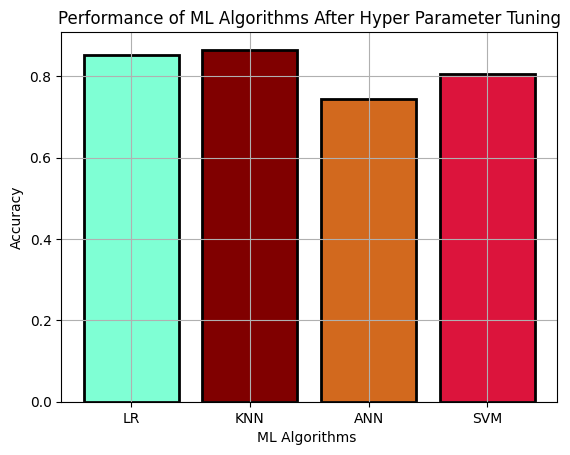

In [ ]:
#After Hypertuning Test is done
x1=["LR","KNN","ANN","SVM"]
height1=[accuracy_logistic,accuracy_knn,test_accuracy_tune,accuracy_svm]
y1= ["LR","KNN","ANN","SVM"]
plt.bar(x1,height1, tick_label = y1,
        width = 0.8, color = ['aquamarine', 'maroon','chocolate','crimson'],edgecolor='black',linewidth=2)

# naming the x-axis
plt.xlabel('ML Algorithms ')
# naming the y-axis
plt.ylabel('Accuracy')
# plot title
plt.title('Performance of ML Algorithms After Hyper Parameter Tuning')
plt.grid(True)
# function to show the plot
plt.show()






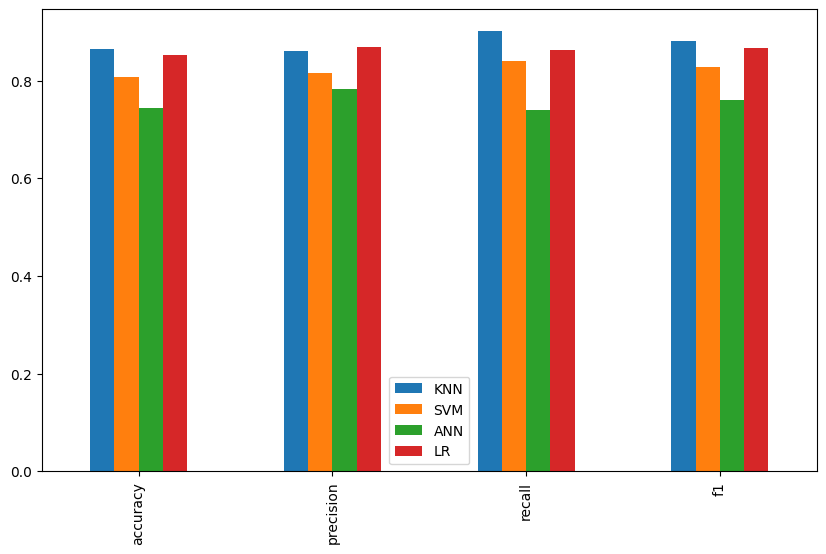

In [ ]:
compare_metrics=pd.DataFrame({"KNN":knn_report,"SVM":svm_report,"ANN":tf_report,"LR":logistic_report})
compare_metrics.plot.bar(figsize=(10,6));

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,log_preds)

array([[ 90,  17],
       [ 18, 113]])

In [ ]:
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



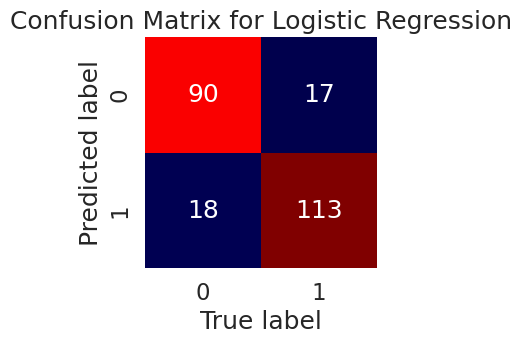

In [ ]:
#Logistic Regression Confusion Matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,log_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,log_preds),
                 annot=True,
                 cbar=False,cmap = "seismic",
                 fmt='d')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title("Confusion Matrix for Logistic Regression")

plot_conf_mat(y_test,log_preds)  #log regressionn


In [ ]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.86      0.90      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.86      0.86       238
weighted avg       0.87      0.87      0.87       238



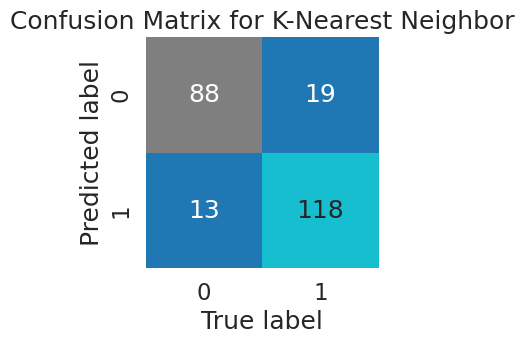

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,knn_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,knn_preds),
                 annot=True,
                 cbar=False,cmap = "tab10",
                 fmt='d')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title("Confusion Matrix for K-Nearest Neighbor")
plot_conf_mat(y_test,knn_preds)

In [ ]:
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       107
           1       0.81      0.84      0.83       131

    accuracy                           0.81       238
   macro avg       0.81      0.80      0.80       238
weighted avg       0.81      0.81      0.81       238



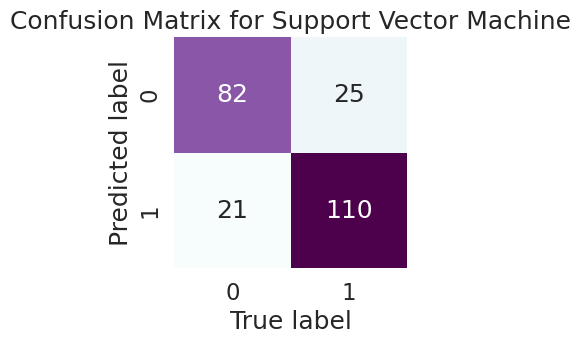

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,svm_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,svm_preds),
                 annot=True,
                 cbar=False,cmap = "BuPu",
                 fmt='d')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title("Confusion Matrix for Support Vector Machine")
plot_conf_mat(y_test,svm_preds)

In [ ]:
tf_preds=model_tune.predict(x_test)
something=[]
for i in tf_preds:
    if i>0.5:
        something.append(1)
    else:
        something.append(0)
tf_preds=np.array(something)
tf_preds

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
y_test=np.array(y_test)
y_test

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

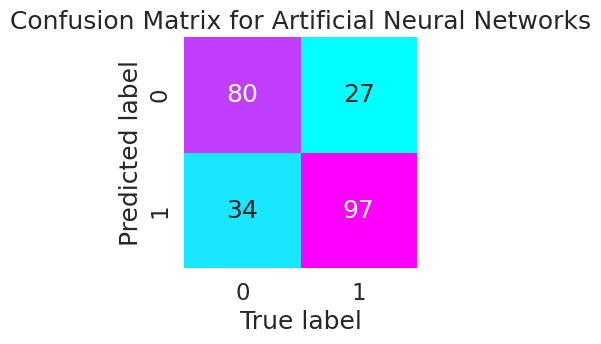

In [ ]:

sns.set(font_scale=1.5)
def plot_conf_mat(y_test,tf_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,tf_preds),
                 annot=True,
                 cbar=False,cmap = "cool",
                 fmt='d')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title("Confusion Matrix for Artificial Neural Networks")
plot_conf_mat(y_test,tf_preds)

In [ ]:
print(classification_report(y_test,tf_preds))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       107
           1       0.78      0.74      0.76       131

    accuracy                           0.74       238
   macro avg       0.74      0.74      0.74       238
weighted avg       0.75      0.74      0.74       238



Address Class Imbalance: The support numbers suggest a slight imbalance. Techniques like SMOTE (Synthetic Minority Over-sampling Technique), adjusting class weights in the model training process, or different sampling strategies can be explored.

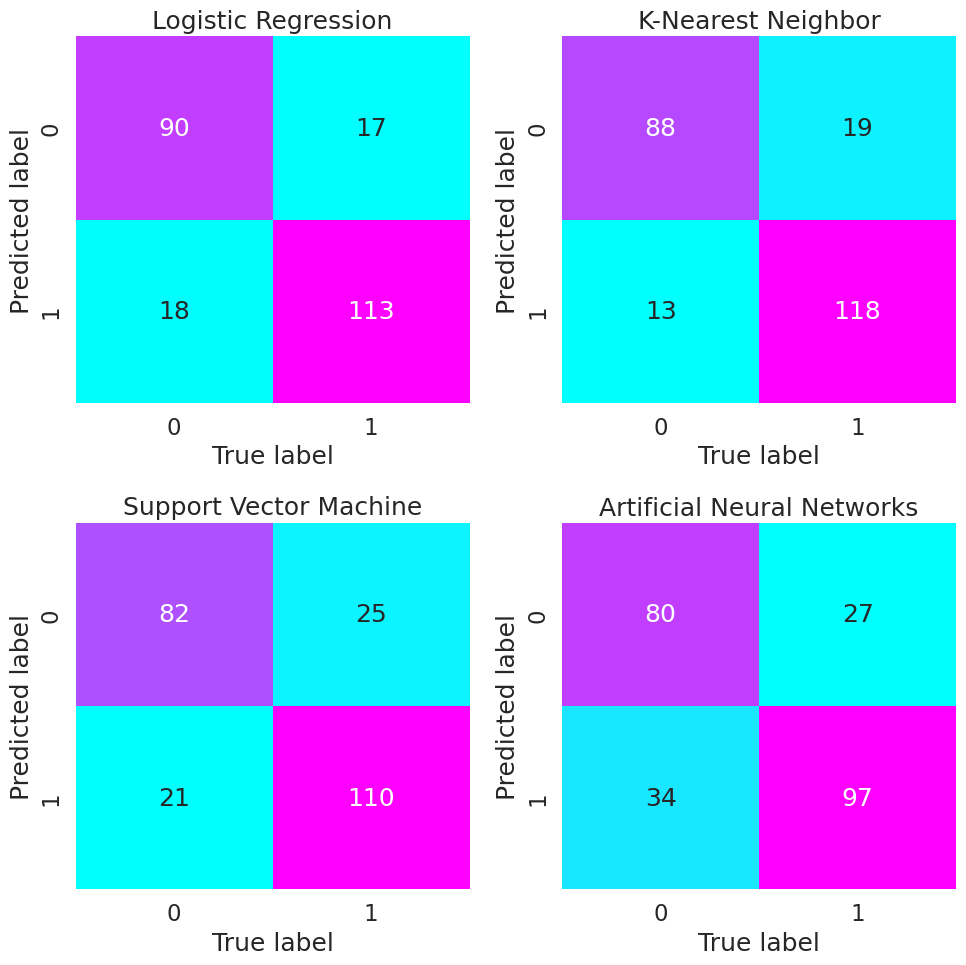

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the font scale and style for seaborn
sns.set(font_scale=1.5, style='whitegrid')

def plot_confusion_matrices(y_test, predictions, titles, cmaps):
    # Define the number of rows and columns you need for your subplots
    nrows = 2
    ncols = 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for ax, preds, title, cmap in zip(axes, predictions, titles, cmaps):
        # Compute the confusion matrix
        conf_mat = confusion_matrix(y_test, preds)

        # Plot the confusion matrix
        sns.heatmap(conf_mat, annot=True, ax=ax, cbar=False, cmap=cmap, fmt='d')
        ax.set_title(title)
        ax.set_xlabel("True label")
        ax.set_ylabel("Predicted label")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

predictions = [log_preds, knn_preds, svm_preds, tf_preds]
titles = [
    "Logistic Regression",
    "K-Nearest Neighbor",
    "Support Vector Machine",
    "Artificial Neural Networks"
]
cmaps = ['cool','cool','cool','cool']

plot_confusion_matrices(y_test, predictions, titles, cmaps)